# Data Analysis

In this notebook, our goal is to perform a comprehensive analysis of our dataset to extract valuable information and gain insights from the data. Through this analysis, we hope to identify trends, patterns, and relationships in the data that can help us understand a little more from roller coasters.

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import geopandas as gpd

In [115]:
df = pd.read_csv('coaster_db_clean.csv')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1087 non-null   object 
 1   location          915 non-null    object 
 2   manufacturer      1028 non-null   object 
 3   designer          578 non-null    object 
 4   type              1087 non-null   object 
 5   model             629 non-null    object 
 6   track_layout      366 non-null    object 
 7   status            874 non-null    object 
 8   lift_launch       804 non-null    object 
 9   latitude          812 non-null    float64
 10  longitude         812 non-null    float64
 11  open_year         1087 non-null   int64  
 12  close_year        236 non-null    float64
 13  height            965 non-null    float64
 14  length            953 non-null    float64
 15  drop              494 non-null    float64
 16  max_angle         357 non-null    float64


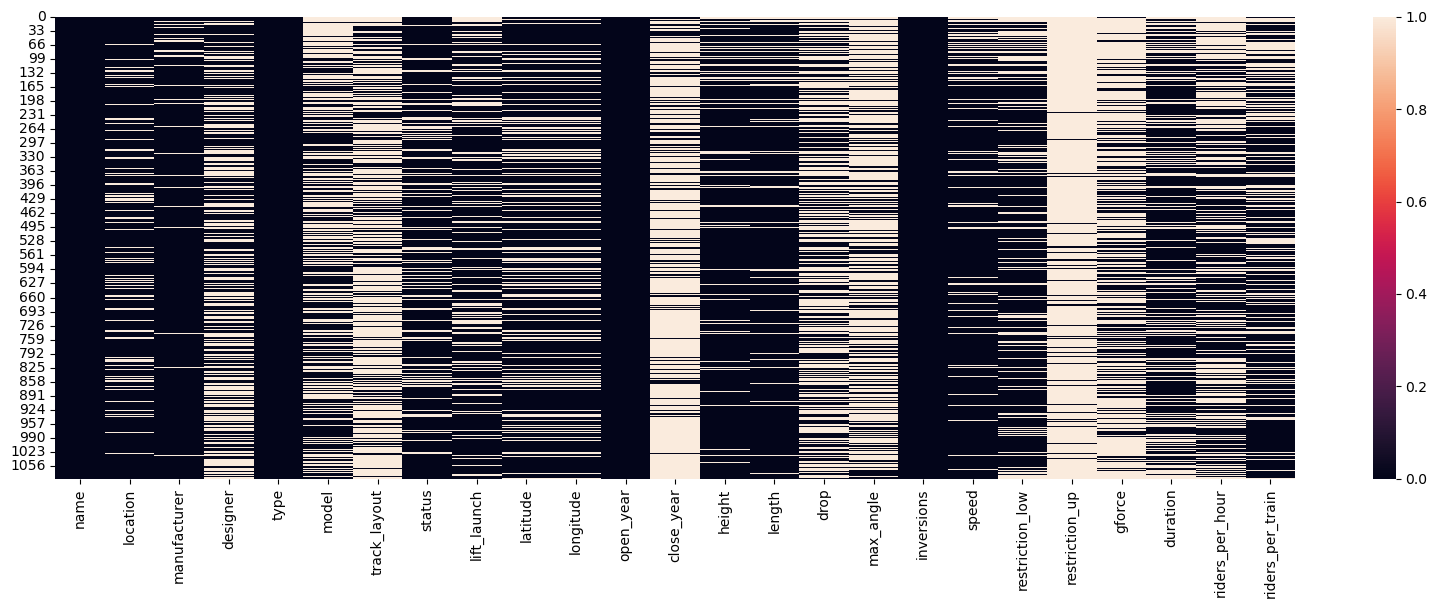

In [117]:
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull());

As we can see from our dataset, there are numerous missing values, which can pose a challenge to our data analysis. Missing data can lead to biased or incomplete results, and can limit the scope of our analysis. The upper restriction has a lot of missing values, we are dropping it.

In [118]:
df = df.drop('restriction_up', axis = 1)

## 1. Identifying Outliers

Outliers have a significant impact on data analysis, as they can skew results and prevent an accurate representation of the majority of the data. This can lead to misleading insights and inferences, and can even invalidate statistical analyses and models. Our approach to identifying them are boxplots.

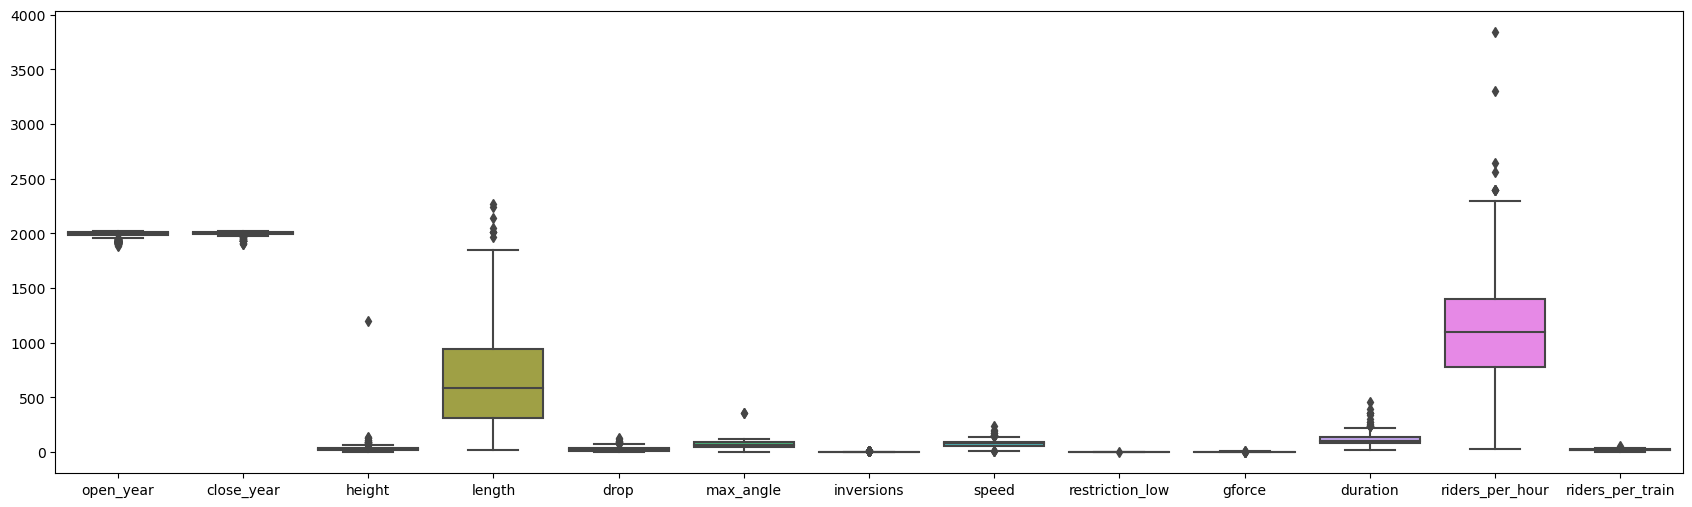

In [119]:
cat = range(1, 9)
geo = [9, 10]
num = range(11,24)
var = range(13, 18)
target = range(18, 24)

df_aux = df.iloc[:, num]

plt.figure(figsize=(21, 6))
sns.boxplot(df_aux);

Since we are trying to identify outliers for features with different ranges, we have some distortions, making difficult to address outliers properly. In order to solve this problem, it is recommended to scale the features to the same mean and standard deviation. By doing so, we can obtain a more accurate visual analysis that is not biased towards features with a larger range.

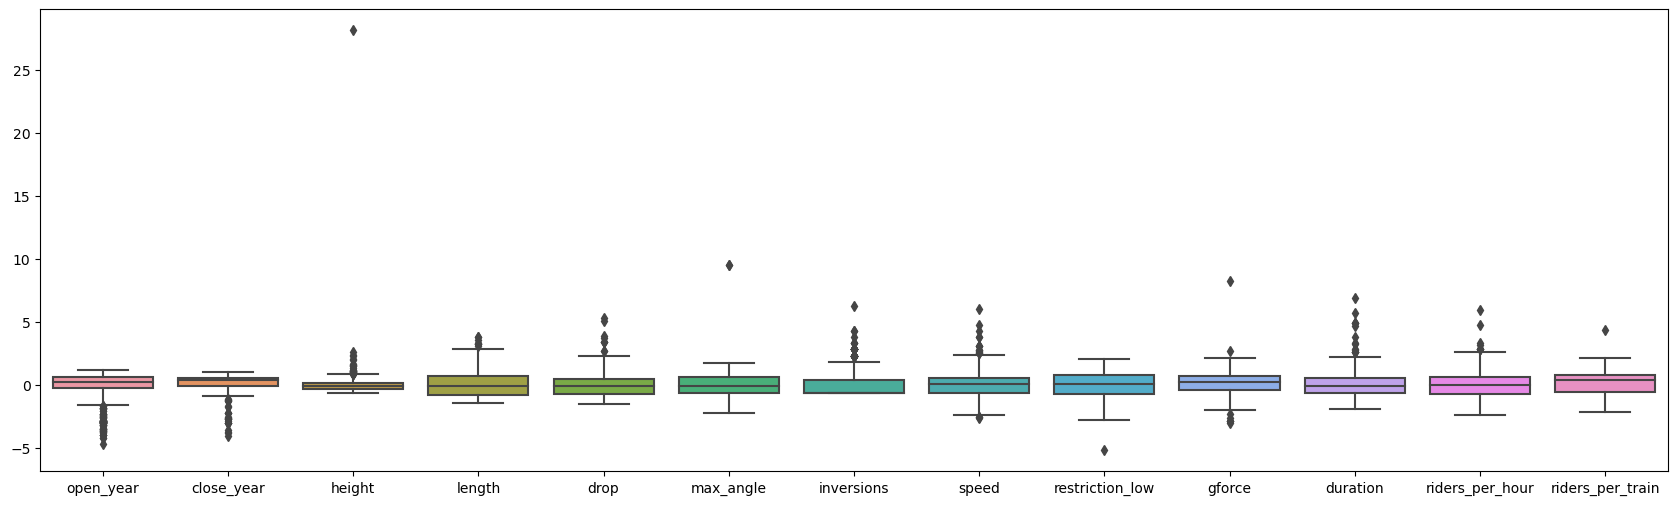

In [120]:
df_aux = df.iloc[:, num]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_aux)
df_scaled = pd.DataFrame(df_scaled, columns=df_aux.columns)

plt.figure(figsize=(21, 6))
sns.boxplot(df_scaled);

Let's investigate the outliers for the following features: `height`,  `max_angle`,  `gforce`,  `restriction_low`,  `riders_per_train`.

In [121]:
df.query('height > 1000').transpose()

,905
name,Smoky Mountain Alpine Coaster
location,NaN
manufacturer,Wiegand
designer,NaN
type,Steel
model,custom
track_layout,NaN
status,operating
lift_launch,lift
latitude,35.7934


The Smoky Mountain Alpine Coaster is actually a type of roller coaster known as a mountain coaster, which uses the natural terrain of a mountain to create a unique and thrilling ride experience. It's true that the coaster's location on a mountain contributes to its height. The coaster uses magnetic braking systems to maintain a slower speed despite its height, which can impact the overall ride experience for riders.

In [122]:
df.query('restriction_low < 0.8').transpose()

,132
name,Lil' Thunder
location,Six Flags Great Adventure
manufacturer,Molina & Sons
designer,NaN
type,Steel
model,little dipper
track_layout,NaN
status,closed
lift_launch,NaN
latitude,40.138


Lil' Thunder have the lowest height restriction, but also have the slowest speed, which justifies this particular characteristic, ensuring a safer and more enjoyable experience for riders.

In [123]:
df.query('gforce > 6.5').transpose() 

,1
name,Flip Flap Railway
location,Sea Lion Park
manufacturer,Lina Beecher
designer,Lina Beecher
type,Wood
model,NaN
track_layout,NaN
status,closed
lift_launch,NaN
latitude,40.578


Flip Flap Railway was notorious for the extreme g-forces that it produced in its riders. The circular nature of the coaster's loop, as well as its relatively small diameter of 25 feet, meant that it could produce forces of approximately 12 g. This caused riders to often experience discomfort and neck injuries from whiplash. 

In [124]:
df.query('max_angle > 130').transpose() 

,679,833
name,G Force,BuzzSaw
location,Drayton Manor Theme Park,Dreamworld
manufacturer,Maurer AG,Maurer AG
designer,NaN,NaN
type,Other,Steel
model,custom,custom
track_layout,NaN,NaN
status,closed,closed
lift_launch,NaN,lift
latitude,52.6128,-27.8623


BuzzSaw and GForce are twisted roller coasters, which justified the max angle being 360º.

In [125]:
df.loc[905, 'height'] = np.nan
df.loc[1, 'gforce'] = np.nan
df.loc[[679, 833], 'max_angle'] = np.nan

df.loc[df['type'] == 'other', 'type'] = np.nan

## 2. Top 5 locations, manufacturers and designers analysis

In [126]:
for col in df.iloc[:, cat].columns:
    n = len(df[col].value_counts())
    print(f'{col:12s}:  {n:3d}')

location    :  298
manufacturer:  102
designer    :  153
type        :    3
model       :   50
track_layout:   14
status      :    3
lift_launch :    2


`location`, `manufacturer`, `designer`, `model` and `track_layout` exhibit a high cardinality, posing challenges in analyzing the dataset. Consequently, our focus will be on investigating the top five most frequently occurring values within these variables.

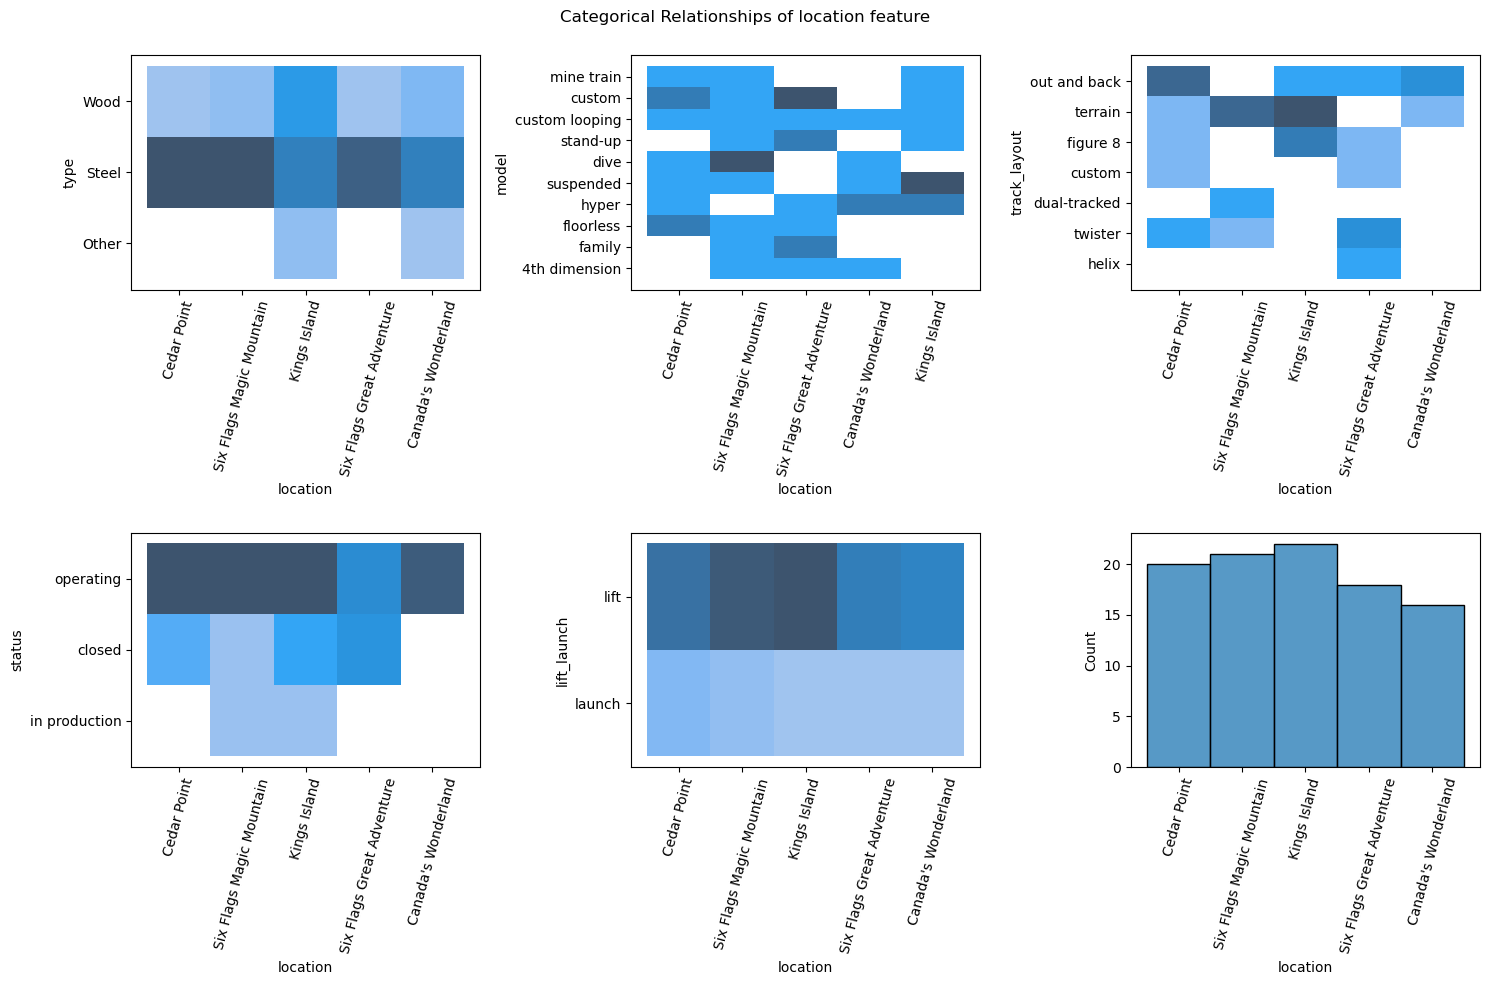

In [127]:
df_aux = df.iloc[:, cat]

cols = df.iloc[:, cat].columns

cc = ['location', 'manufacturer', 'designer']

col_drop = cols.to_list()
col_drop = [cd for cd in col_drop if cd not in cc]


def plot_categorical(df, c):
    
    series = df.loc[:, c].value_counts(
    ).sort_values(ascending = False)
        
    series = series.iloc[:5].index
    ind = df.loc[:, c].isin(series)
    df_ = df.loc[ind, :]
    
    fig, ax = plt.subplots(2, 3, figsize = (15, 10))
    
    fig.suptitle(f'Categorical Relationships of {c} feature')
    for i, col in enumerate(col_drop):
        
        if col == 'model':
            series = df_.loc[:, col].value_counts(
            ).sort_values(ascending = False)
            
            series = series.iloc[:10].index
            ind = df_.loc[:, col].isin(series)
            df_2 = df_.loc[ind, :]
            
            sns.histplot(data=df_2, x = c, y = col, ax = ax[i//3, i%3])
            ax[i//3, i%3].tick_params(axis='x', rotation=75)
            ax[i//3, i%3].set_title(' ')
            
        else:
            sns.histplot(data=df_, x = c, y = col, ax = ax[i//3, i%3]) 
            ax[i//3, i%3].tick_params(axis='x', rotation=75)
            ax[i//3, i%3].set_title(' ')
        
    sns.histplot(data=df_, x = c, ax = ax[1, 2])
    ax[1, 2].tick_params(axis='x', rotation=75)
    ax[1, 2].set_title('')
            
    fig.tight_layout()
        
    return None
    
plot_categorical(df_aux, 'location')

* Custom models are more presented in Six Flags Great Adventure.
* Suspended models are predominant in Kings Island.
* Terrain track layout are predominant in Six Flags Magic Mountain and Kings Island.

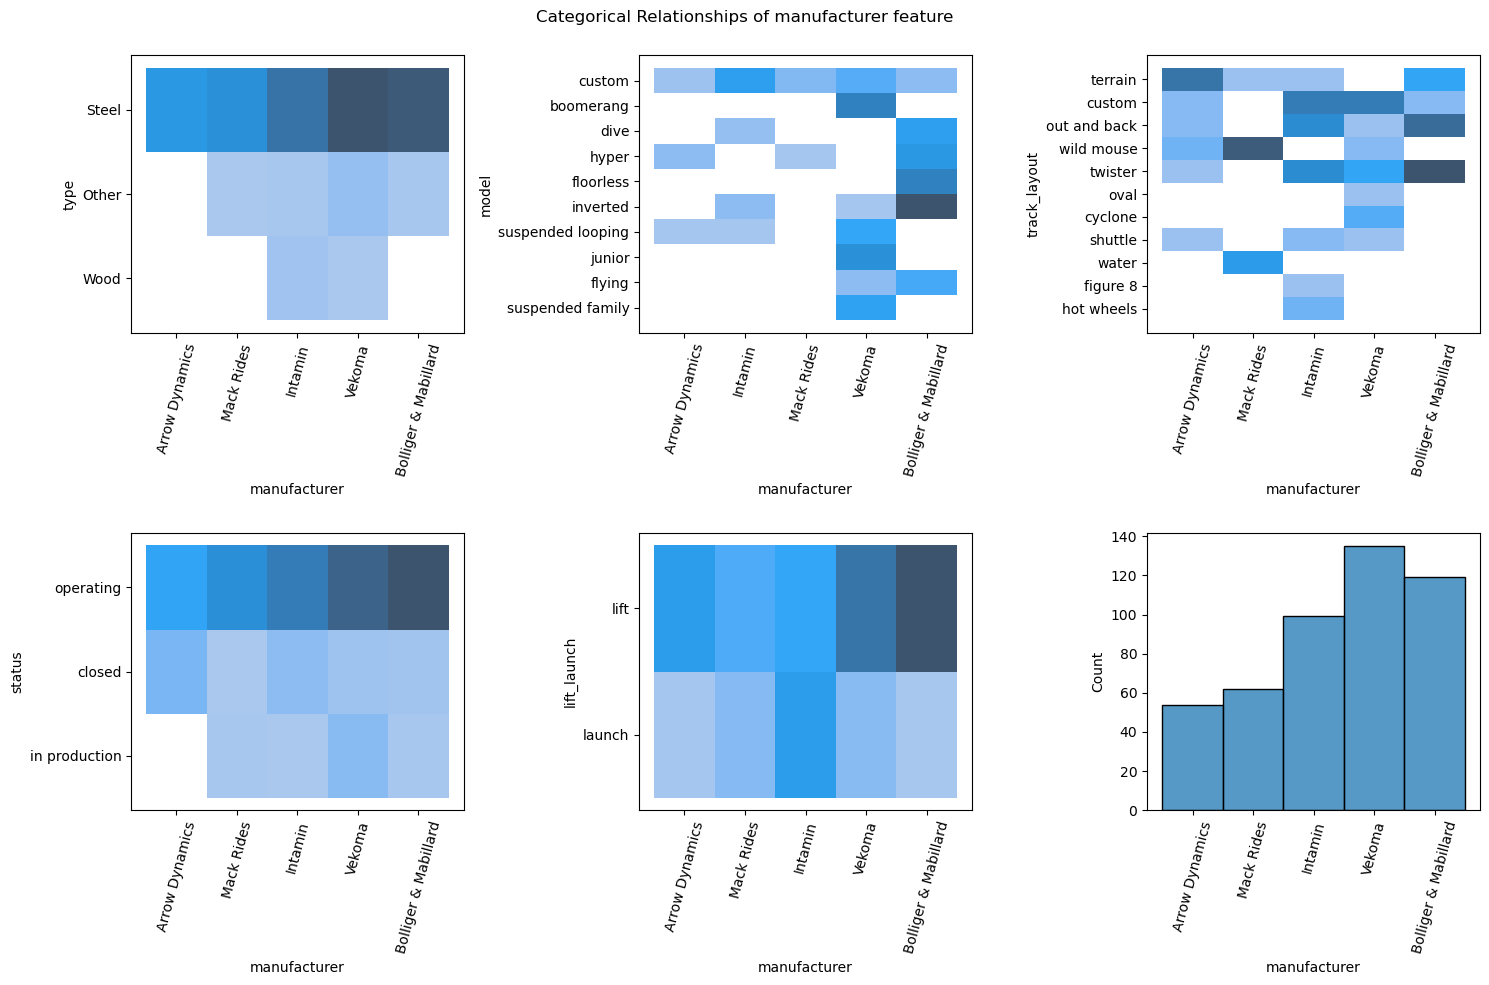

In [128]:
plot_categorical(df_aux, 'manufacturer')

* Inverted models are predominant in Bolliger & Mabillard.
* Wild Mouse track layouts are predominant in Mack Rides.
* Twister track layouts are predominant in Bolliger & Mabillard.
* Vekoma produces the most roller coasters, with a wide variety in model and track layout types.

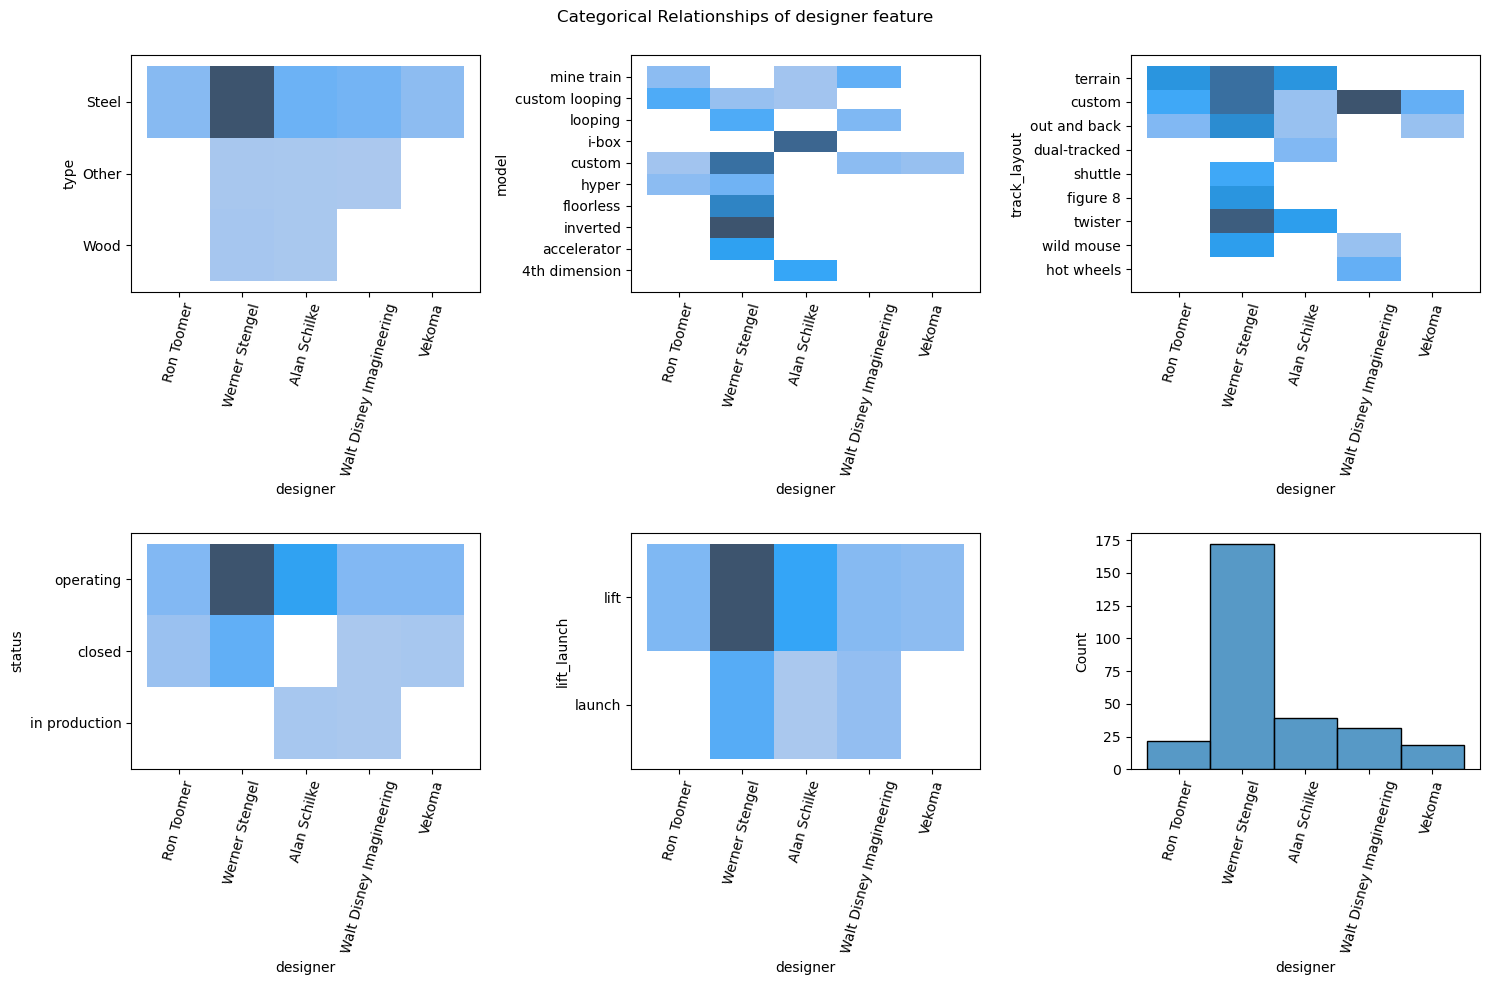

In [129]:
plot_categorical(df_aux, 'designer')

* Werner Stengel is responsible for the largest amount of roller coasters designed, with wide variety in model and track layout types.
* i-box seems to be only produced by Alan Schlike, how mostly produced this type of roller coaster model.
* Walk Disney Imagineening highly focus in custom track layouts.

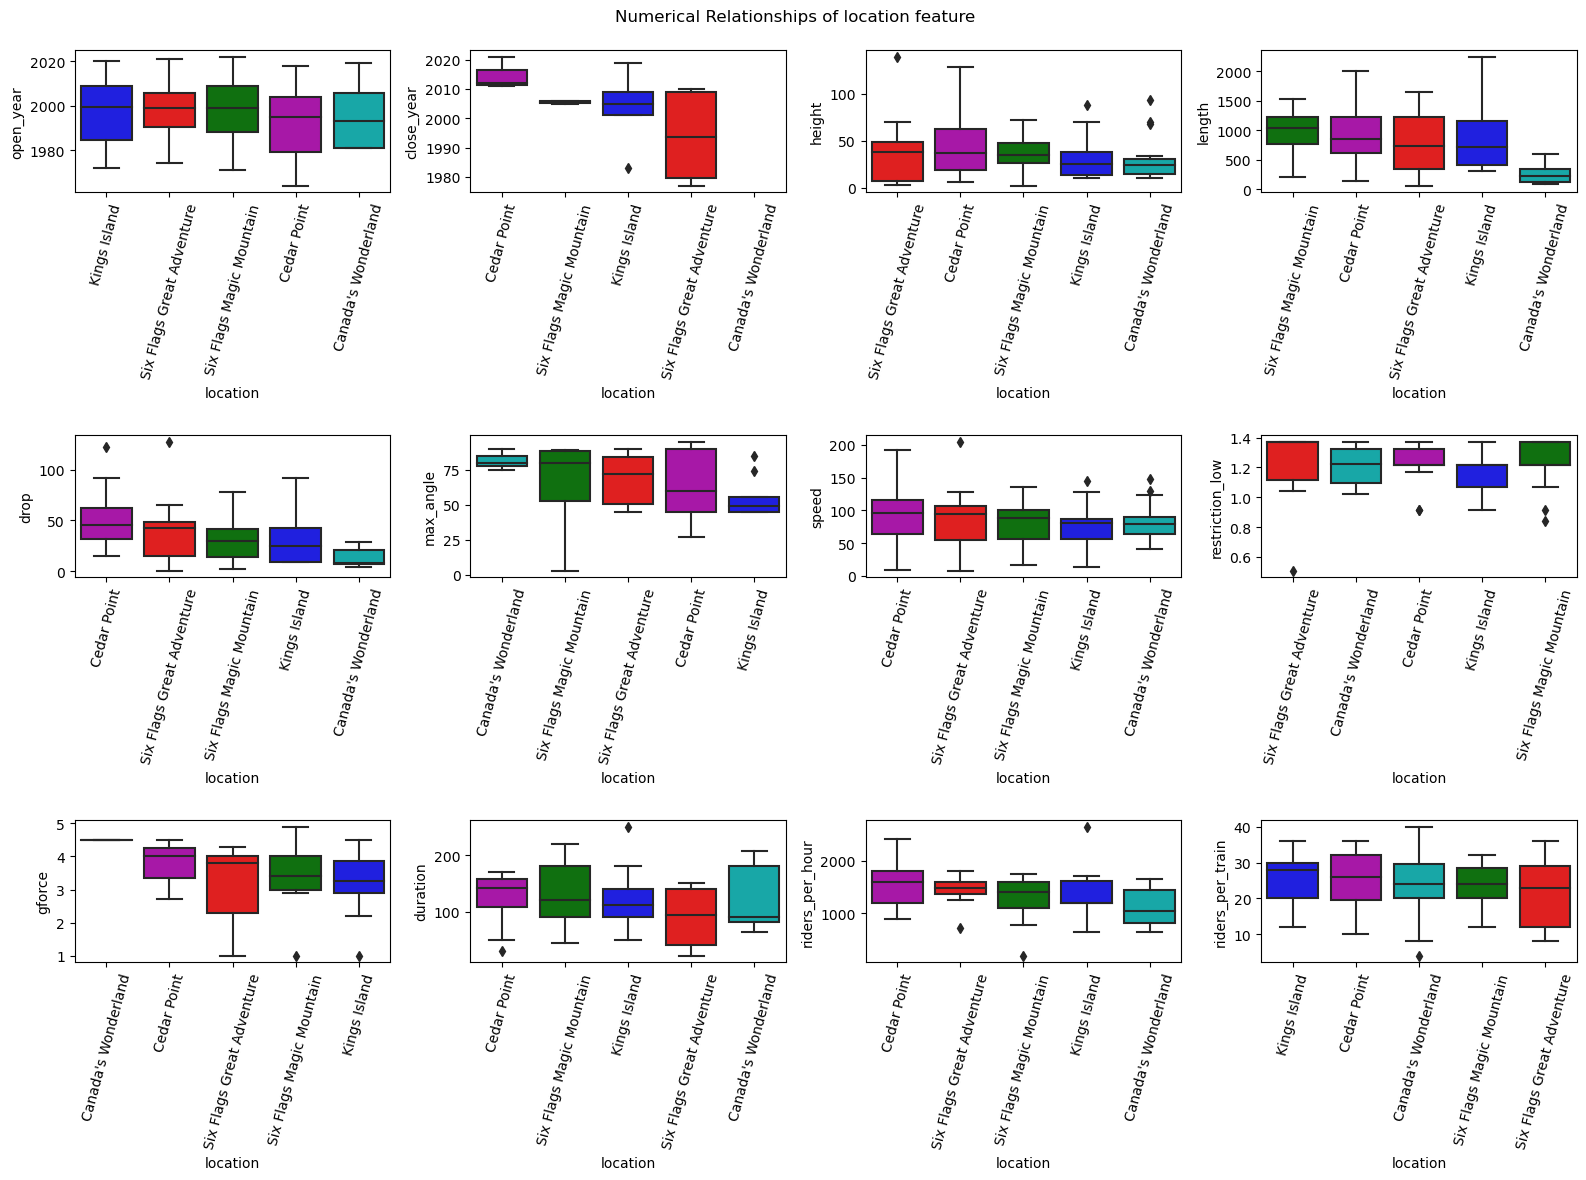

In [130]:
cc = ['location', 'manufacturer', 'designer']
drops = ['inversions']

num_cols = df.iloc[:, num].columns
total_cols = list(num_cols) + cc 

df_aux = df.loc[:, total_cols]

col_drop = num_cols.to_list()
col_drop = [cd for cd in col_drop if cd not in drops]

def plot_numeric(df_aux, c):
        
    series = df_aux.loc[:, c].value_counts(
    ).sort_values(ascending = False)
        
    series = series.iloc[:5].index
    ind = df_aux.loc[:, c].isin(series)
    df_aux1 = df_aux.loc[ind, :]
    
    sc = 0.8
    
    color = ['b', 'g', 'm', 'r', 'c']
    
    my_pal = {s:cr for s, cr  in zip(series, color)}
    
    fig, ax = plt.subplots(3, 4, figsize = (20 * sc, 15 * sc))
    
    fig.suptitle(f'Numerical Relationships of {c} feature')
    
    for i, col in enumerate(col_drop):
        
        my_order = df_aux1.groupby(
            by=[c])[col].median(
        ).sort_values(ascending=False)

        sns.boxplot(data=df_aux1, x = c, y = col, ax = ax[i//4, i%4],
                    order = my_order.index, palette=my_pal);
        ax[i//4, i%4].tick_params(axis='x', rotation=75)
        
        ax[i//4, i%4].set_title(' ')
    
    fig.tight_layout()

plot_numeric(df_aux, 'location')

* Six Flags Magic Mountain roller coaster were closed in proximate dates.
* Canada's Wonderland have a small length distribuition, as well as drop.
* Canada's Wonderland max angle are predominaly large.
* Canada's Wonderland have a unique g-force.

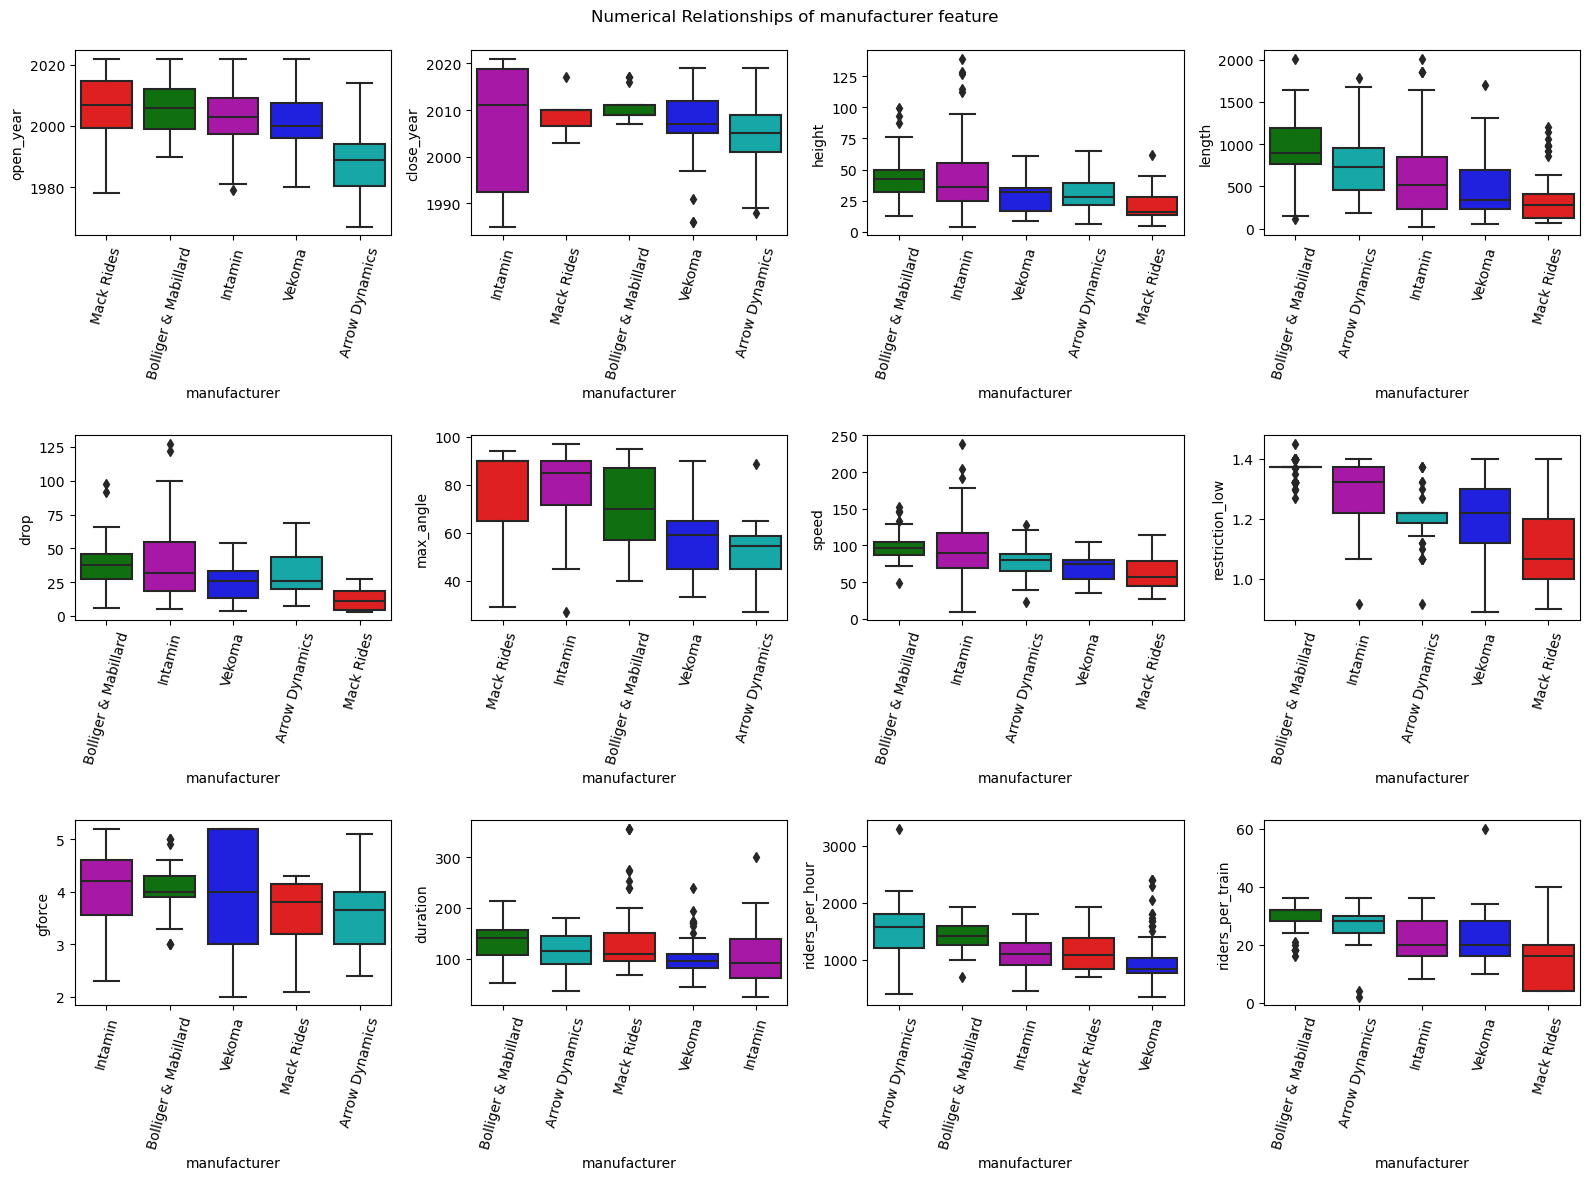

In [131]:
plot_numeric(df_aux, 'manufacturer')

* Mack Rides drop have a small drop distribuition.
* Boilinger & Mabillard have a high height restriction.
* Boilinger & Mabillard rides per train are considerable values.

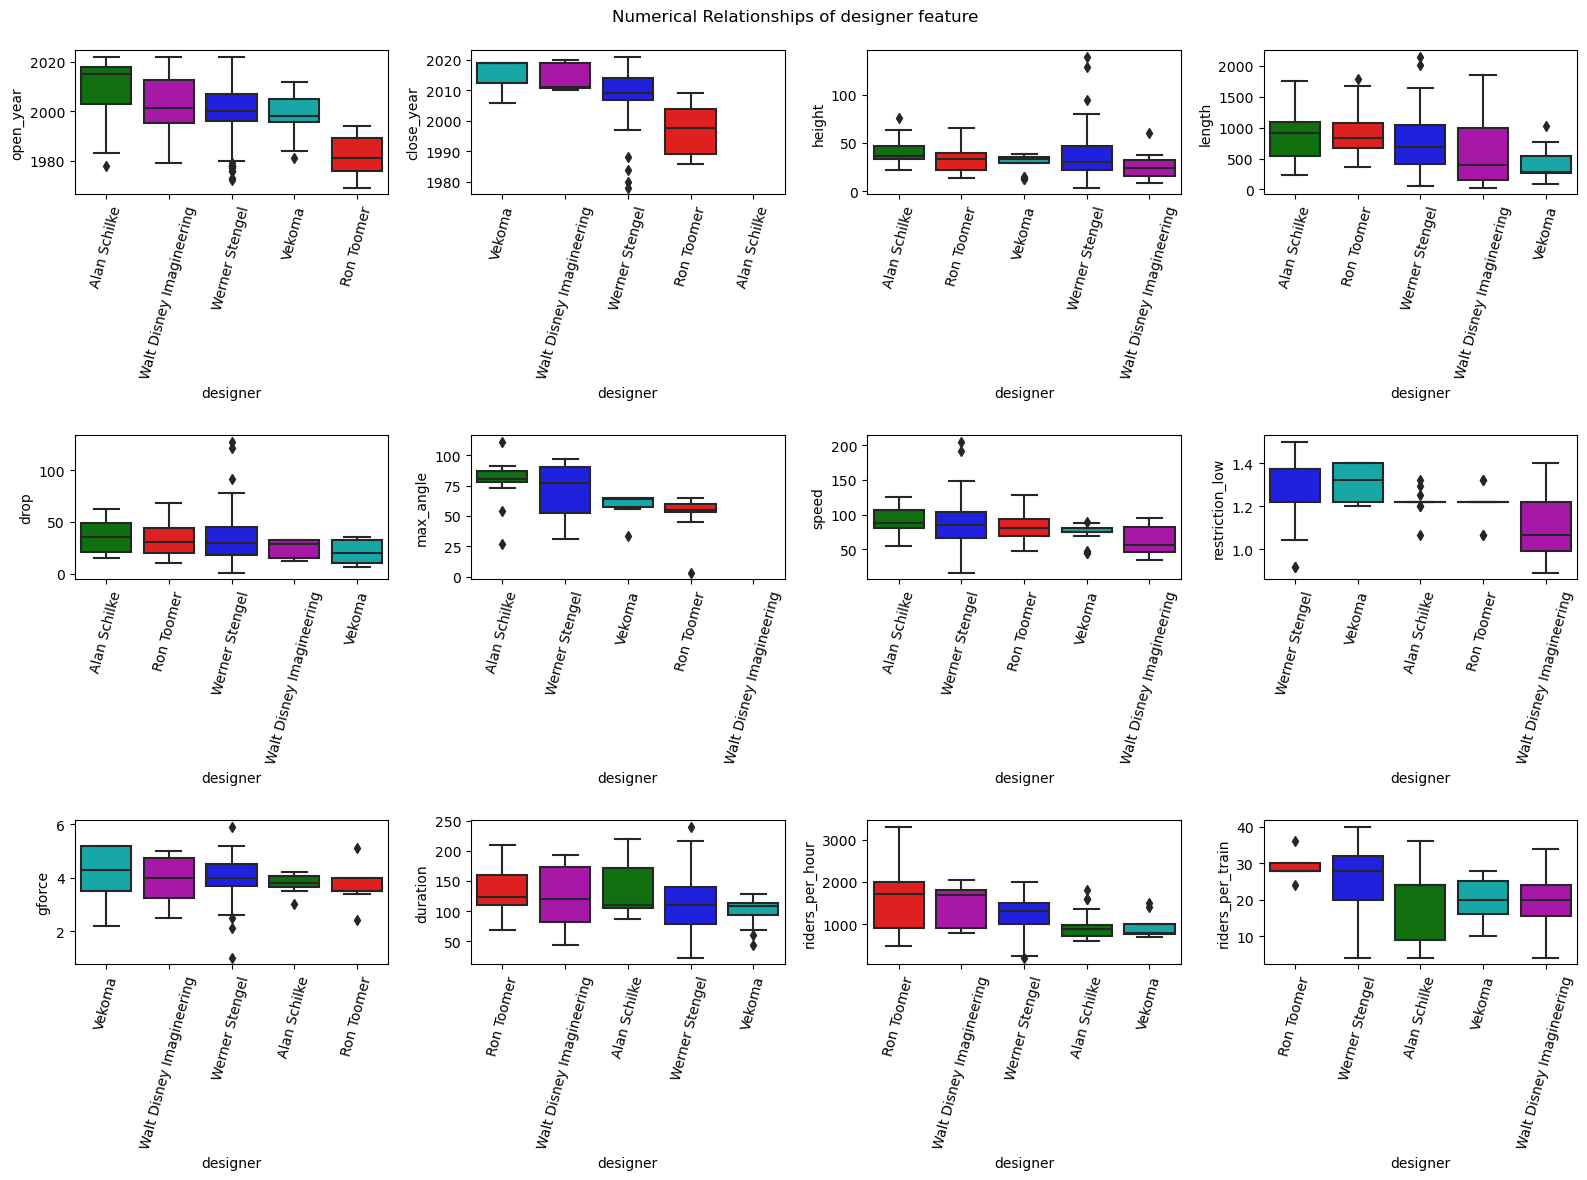

In [132]:
plot_numeric(df_aux, 'designer')

* Vekoma roller coasters speed values have low variance.
* Ron Toomer have designed riders per train have a low variance.

## 3. Numerical Features

Next, let's explore the correlation matrix of the roller coaster, focusing solely on its numerical features. Then, the most notable correlation are going to be further explored.

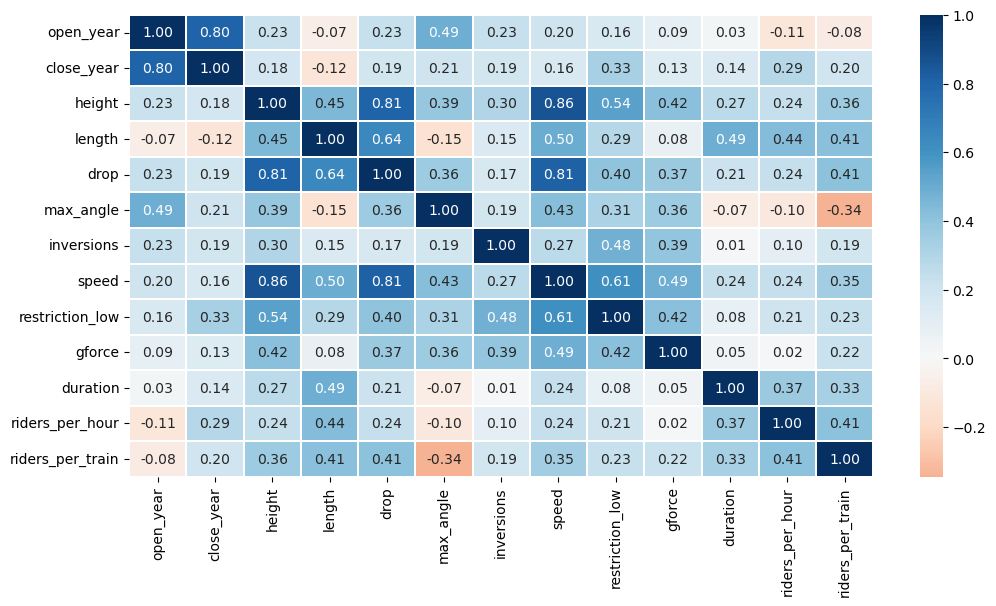

In [133]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.iloc[:, num].corr(),
            center=0, linewidth=0.1,
            annot = True, fmt = '.2f', cmap = 'RdBu');

Some relations to highlight:

* Speed is strongly correlated with drop and height, and moderately with max angle, restriction height, length, gforce and riders per train.
* Height is strongly correlated with drop, and moderately with length, height restriction, max angle, inversions, gforce and riders per train.
* Length is moderately correlated with drop, duration, riders per hour and riders per train.
* GForce is moderately correlated with max angle, drop, inversions and height restriction.
* Height restriction is moderately with max angle, drop, inversions and close year.
* Riders per train is moderately correlated with duration, drop, riders per hour, max angle.
* Open year is strongly correlated with close year and max angle.
* Duration is moderately correlated with riders per hour.
* Drop is moderately correlated with max angle.

### 3.1. Speed

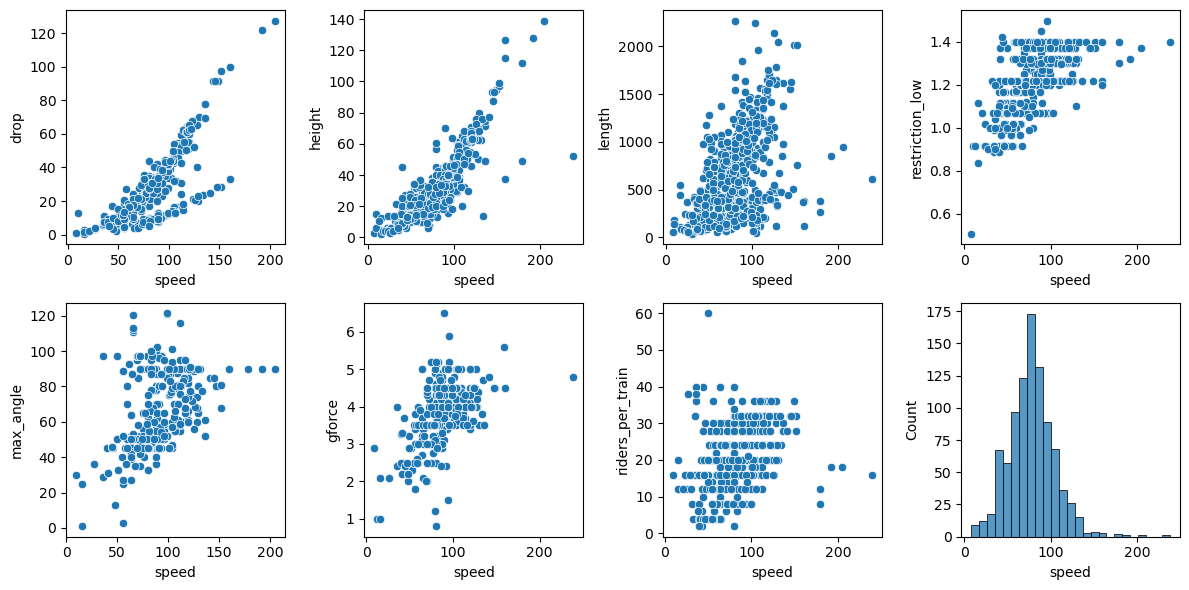

In [134]:
fig, ax = plt.subplots(2, 4, figsize = (12, 6))

feats = ['drop', 'height', 'length', 'restriction_low', 'max_angle', 'gforce', 'riders_per_train']

for i, f in enumerate(feats):
    sns.scatterplot(data = df, x = 'speed', y=f, ax = ax[i//4, i%4])
    
bin_number = 25 #int((sum(df['speed'].notnull()))**0.5)

sns.histplot(data = df, x = 'speed', ax = ax[1, 3], bins = bin_number)

fig.tight_layout()

Conclusions:

* A roller coaster's speed is directly influenced by the height and drop it possesses. The higher the drop and height, the faster the train will ride.
* Roller coasters with longer lengths provide ample space for the train to gather speed, enhancing the overall experience.
* Higher speeds necessitate stricter restrictions for riders due to the increased intensity and potential risks.
* The maximum angle of a roller coaster impacts its speed since the gravitational force becomes more prominent, affecting the overall velocity.
* Generally, as speed increases, the g-force experienced by riders also tends to increase.
* There is a positive correlation between the number of riders per train and speed. This relationship can be explained by the additional weight that riders contribute to the train, thereby increasing the gravitational force experienced during the ride.


### 3.2. Height

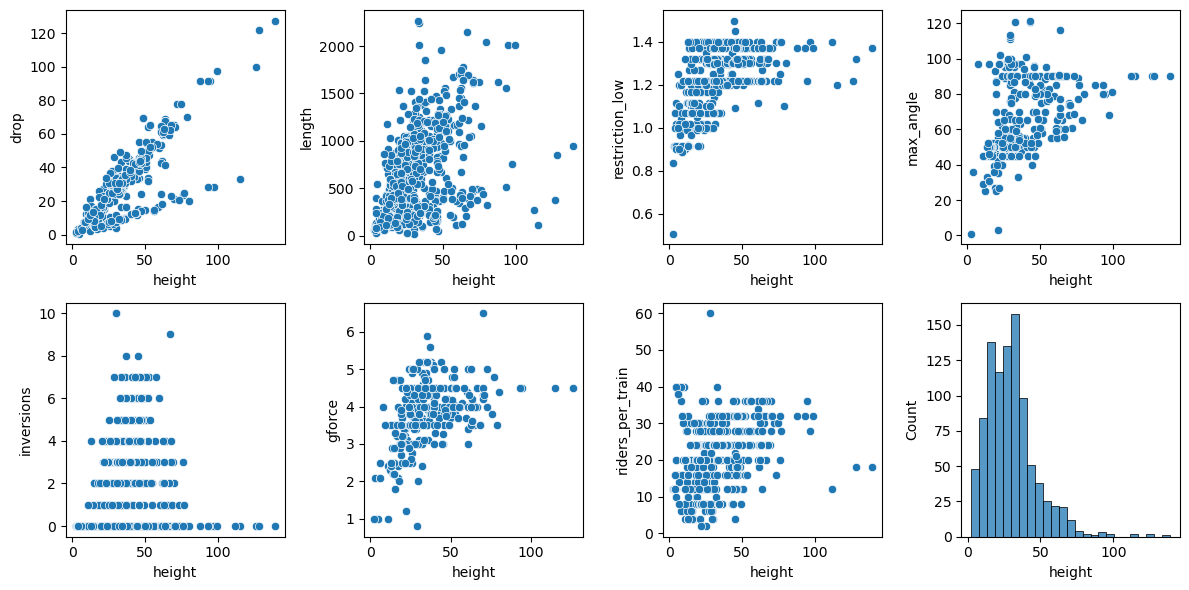

In [135]:
fig, ax = plt.subplots(2, 4, figsize = (12, 6))

feats = ['drop', 'length', 'restriction_low', 'max_angle', 'inversions', 'gforce', 'riders_per_train']

xx = 'height'

for i, f in enumerate(feats):
    sns.scatterplot(data = df, x = xx, y=f, ax = ax[i//4, i%4])
    
bin_number = 25

sns.histplot(data = df, x = xx, ax = ax[1, 3], bins = bin_number)

fig.tight_layout()
    

Conclusions:

* Higher heights allow for the setting of more significant drops in a roller coaster.
* Roller coasters with greater heights require a longer track length to accommodate the thrilling ride experience.
* Large height values necessitate more stringent height restrictions for riders.
* Increasing the height of a roller coaster leads to higher costs and increased track usage, which may not always justify the additional expenses associated with incorporating inversion systems.
* As height influences speed, it indirectly affects the experienced g-force during the ride.
* There is a positive correlation between the maximum angle and the number of riders per train with the height of the roller coaster.

### 3.3. Length

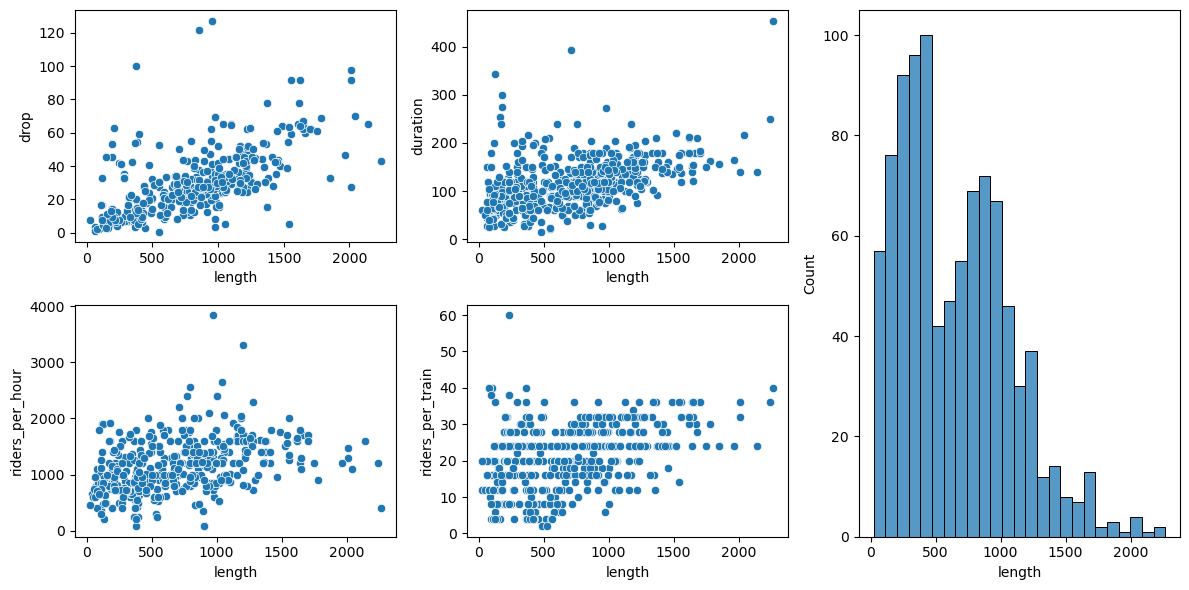

In [136]:
fig, ax = plt.subplots(2, 3, figsize = (12, 6))

feats = ['drop', 'duration', 'riders_per_hour', 'riders_per_train']

xx = 'length'

for i, f in enumerate(feats):
    sns.scatterplot(data = df, x = xx, y=f, ax = ax[i//2, i%2])

gs = ax[0, 2].get_gridspec()
    
ax[0, 2].remove()
ax[1, 2].remove()

bin_number = 25

axbig = fig.add_subplot(gs[:, 2])
sns.histplot(data = df, x = xx, bins = bin_number)


fig.tight_layout()

Conclusions:

* When examining the relationship between length and height, it becomes evident that length indirectly influences the value of the drop in a roller coaster.
* Roller coaster rides tend to last longer when the length of the track is increased.
* One might expect that longer rides would result in a decrease in the number of riders per hour. However, the increase in the number of riders per train as the length of the roller coaster increases leads to an overall increase in riders per hour. This phenomenon can be attributed to the careful consideration of ride duration by designers. They take into account how long the ride will last and the willingness of people to wait, leading them to carefully select the number of riders per train.


### 3.4. G-force

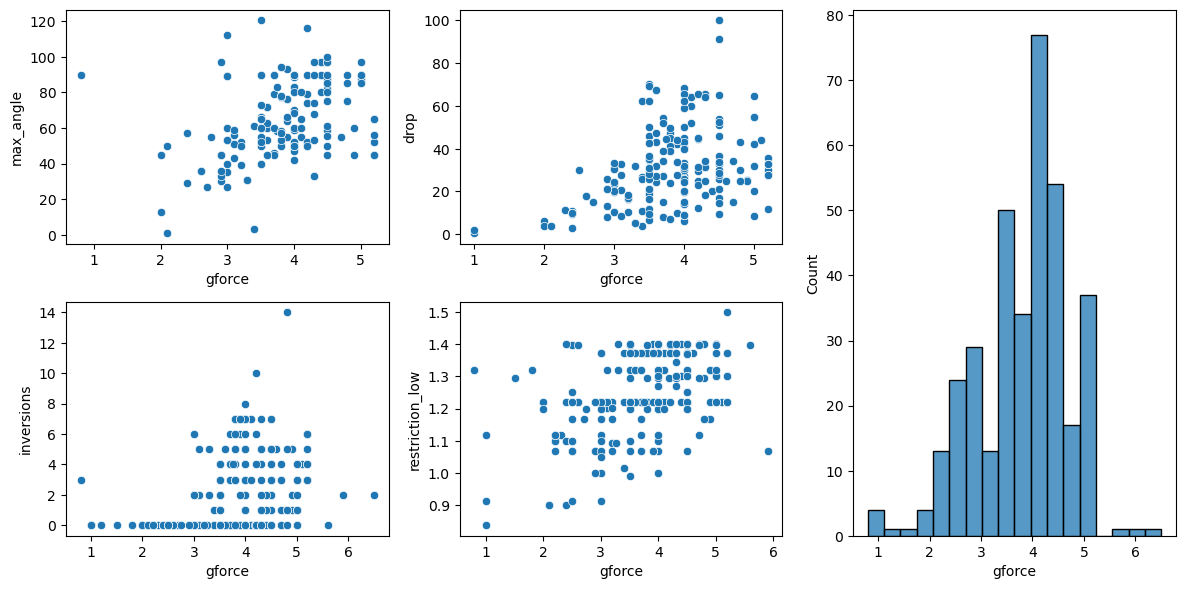

In [137]:
fig, ax = plt.subplots(2, 3, figsize = (12, 6))

feats = ['max_angle', 'drop', 'inversions', 'restriction_low']

xx = 'gforce'

for i, f in enumerate(feats):
    sns.scatterplot(data = df, x = xx, y=f, ax = ax[i//2, i%2])

gs = ax[0, 2].get_gridspec()
    
ax[0, 2].remove()
ax[1, 2].remove()

bin_number = 18

axbig = fig.add_subplot(gs[:, 2])
sns.histplot(data = df, x = xx, bins = bin_number)

fig.tight_layout()

Conclusions:

* The maximum angle and drop of a roller coaster directly impact the experienced g-force during the ride. 
* G-forces smaller than 3 can only be achieved when the roller coaster does not have any inversions. 
* The level of g-force experienced on a roller coaster affects the height restrictions for riders. 

### 3.5. Height restriction

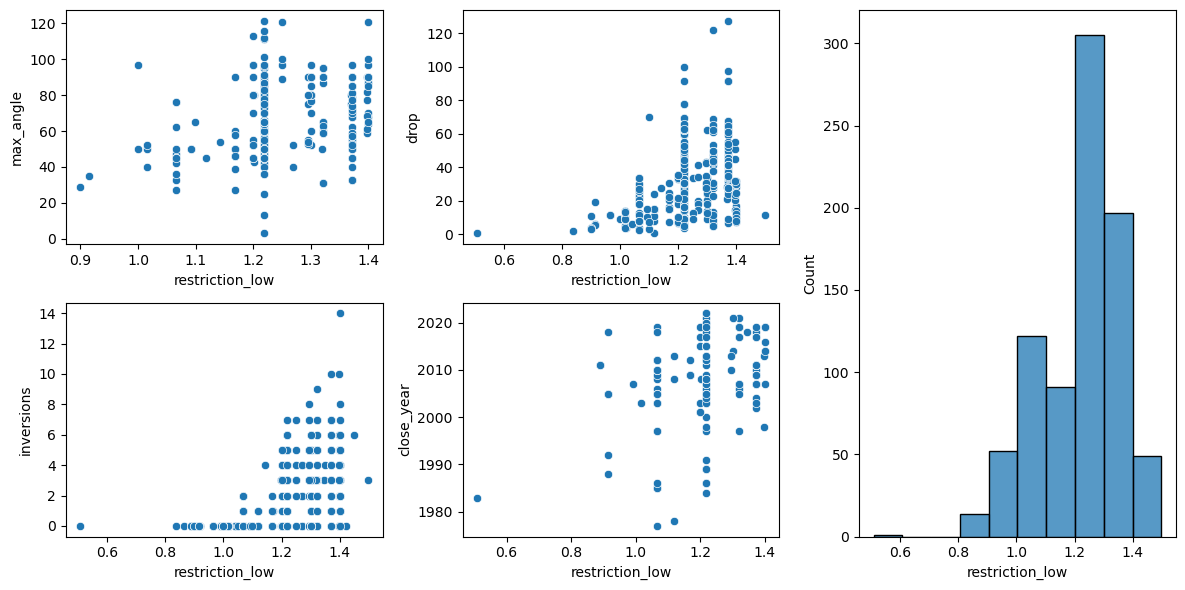

In [138]:
fig, ax = plt.subplots(2, 3, figsize = (12, 6))

feats = ['max_angle', 'drop', 'inversions', 'close_year']

xx = 'restriction_low'

for i, f in enumerate(feats):
    sns.scatterplot(data = df, x = xx, y=f, ax = ax[i//2, i%2])

gs = ax[0, 2].get_gridspec()
    
ax[0, 2].remove()
ax[1, 2].remove()

bin_number = 10

axbig = fig.add_subplot(gs[:, 2])
sns.histplot(data = df, x = xx, bins = bin_number)

fig.tight_layout()

Conclusions:

* To accommodate smaller children in the roller coaster, it is necessary for the ride to exclude inversions. This design choice ensures a safer and more accessible experience for young riders.

### 3.6. Riders per train

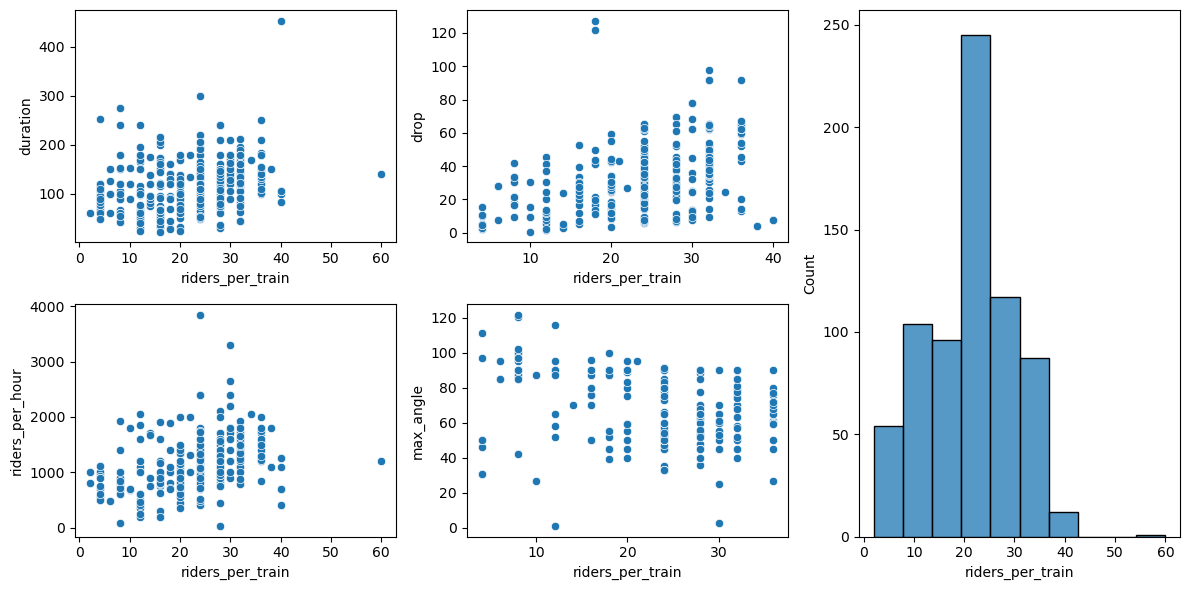

In [139]:
fig, ax = plt.subplots(2, 3, figsize = (12, 6))

feats = ['duration', 'drop', 'riders_per_hour', 'max_angle']

xx = 'riders_per_train'

for i, f in enumerate(feats):
    sns.scatterplot(data = df, x = xx, y=f, ax = ax[i//2, i%2])

gs = ax[0, 2].get_gridspec()
    
ax[0, 2].remove()
ax[1, 2].remove()

bin_number = 10

axbig = fig.add_subplot(gs[:, 2])
sns.histplot(data = df, x = xx, bins = bin_number)

fig.tight_layout()

Conclusions:

* The number of riders per train is indirectly related to the drop of the roller coaster due to the relationship with the length of the ride. Longer rides often allow for more riders per train, as there is ample track to accommodate multiple passengers.
* There is a positive correlation between the number of riders per train and the number of riders per hour. When the roller coaster can accommodate more passengers in each train, it increases the overall capacity of the ride, resulting in a higher number of riders per hour.

### 3.7. Open Year

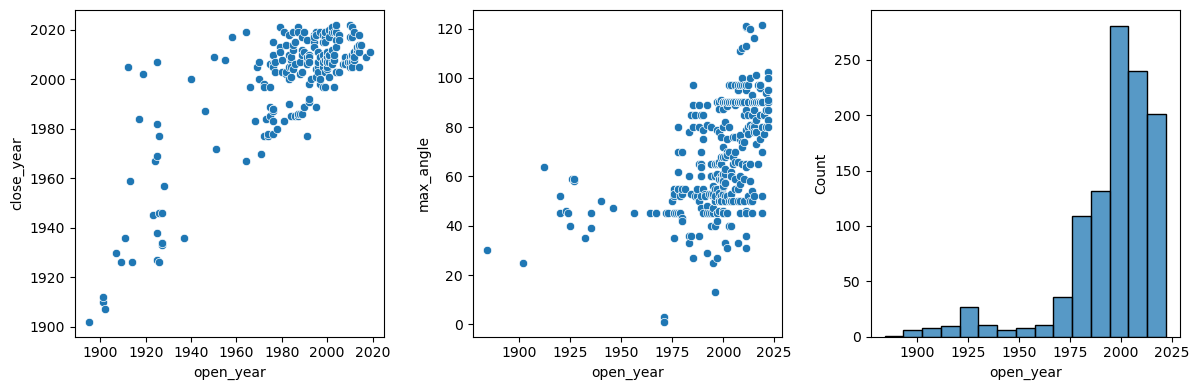

In [140]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

feats = ['close_year', 'max_angle']

xx = 'open_year'

for i, f in enumerate(feats):
    sns.scatterplot(data = df, x = xx, y=f, ax = ax[i ])
    
bin_number = 15

sns.histplot(data = df, x = xx, ax = ax[2], bins = bin_number)

fig.tight_layout()

Conclusions:

* The difference between the close date and the open date is not significantly large.
* High max angles started to be considered past 1975.
* Most of the roller coaster were built recently.

### 3.8. Duration and Drop

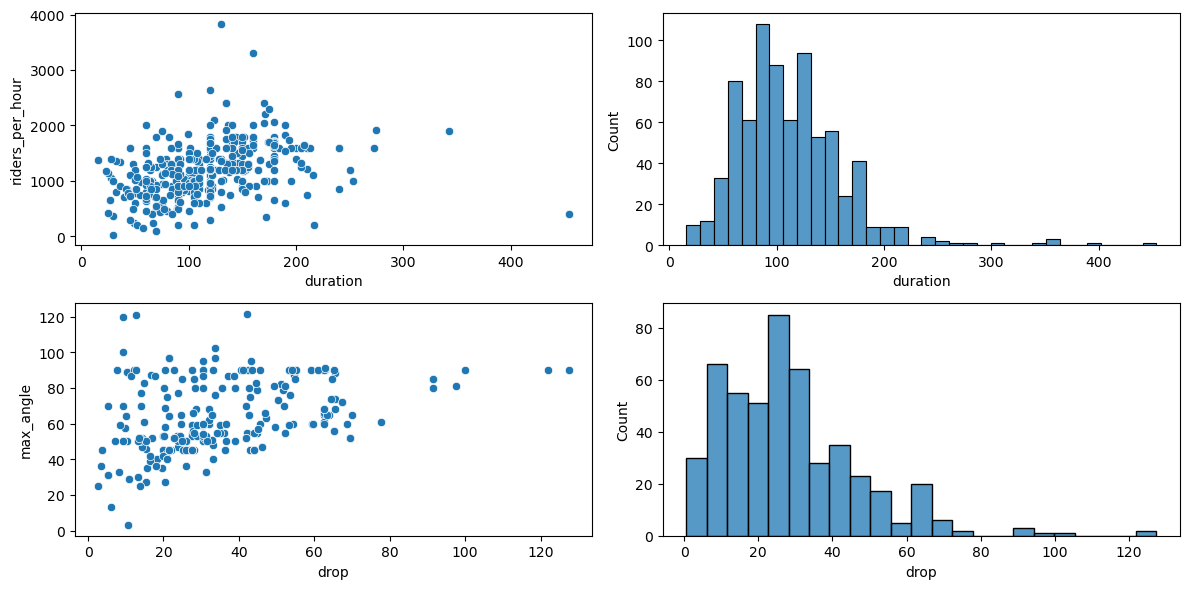

In [141]:
fig, ax = plt.subplots(2, 2, figsize = (12, 6))

feats = ['riders_per_hour', 'max_angle']

xx = ['duration', 'drop']

sns.scatterplot(data = df, x = xx[0], y=feats[0], ax = ax[0, 0])
sns.scatterplot(data = df, x = xx[1], y=feats[1], ax = ax[1, 0])

sns.histplot(data = df, x = xx[0], ax = ax[0, 1])
sns.histplot(data = df, x = xx[1], ax = ax[1, 1])

fig.tight_layout()

Conclusions:

* Similarly, we can observe the same relationship between riders per hour and the duration of the ride, as we did with riders per hour and the length of the roller coaster.
* A steeper maximum angle often corresponds to a larger drop, adding to the excitement and intensity of the ride.

## 4. Geospatial Information

Since we have access to the locations of our roller coasters, let's explore the possibility of extracting geospatial information.

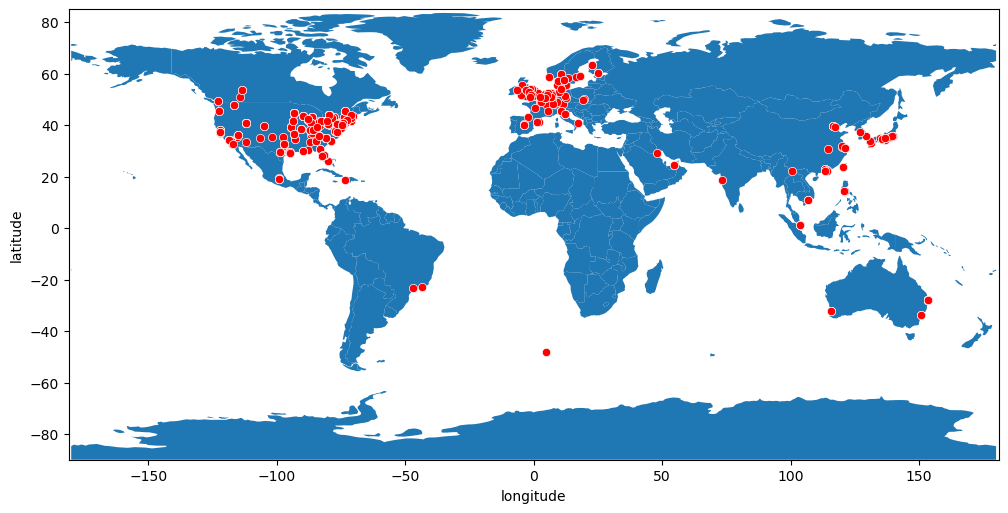

In [142]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot(ax = ax);
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', color = 'r');
ax.set_xlim(-181, 181);
ax.set_ylim(-90, 85);

We have a point in the middle of nowhere, the only one below -40º latitude.

In [143]:
df.query('latitude < -40').transpose()

,1062
name,Krampus Expédition
location,Nigloland
manufacturer,Mack Rides
designer,NaN
type,Steel
model,NaN
track_layout,water
status,operating
lift_launch,lift
latitude,-48.2617


The roller coaster is located in France. It was supposed to be positive latitude (+48.2617). Let's give a correction.

In [144]:
df.loc[1062, 'latitude'] *= (-1)

The majority of roller coasters are concentrated in two main regions: the United States and Europe, while Asia and Oceania have fewer instances. Let's categorize the roller coasters into three main groups based on their locations: America, Europe, and Asia/Oceania. 

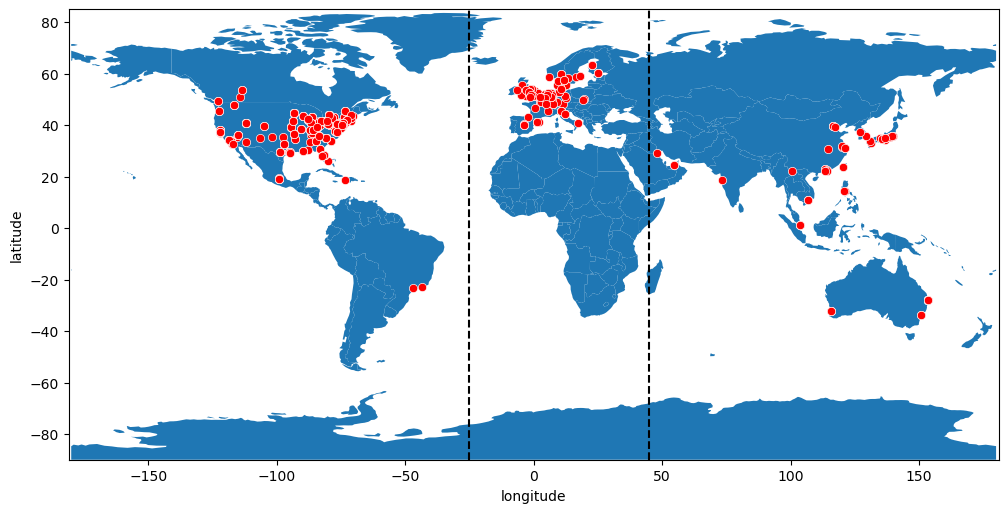

In [145]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot(ax = ax);
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', color = 'r');
ax.axvline(45, color= 'k', ls = '--')
ax.axvline(-25, color= 'k', ls = '--');
ax.set_xlim(-181, 181);
ax.set_ylim(-90, 85);

In [146]:
mask1 = (df.loc[:, 'longitude'] <= - 25)
mask2 = (df.loc[:, 'longitude'] > - 25) & (df.loc[:, 'longitude'] < 48)
mask3 = (df.loc[:, 'longitude'] >= 48)

df['geo_pos'] = np.nan
df.loc[mask1, 'geo_pos'] = 'America'
df.loc[mask2, 'geo_pos'] = 'Europe'
df.loc[mask3, 'geo_pos'] = 'Asia/Oceania'

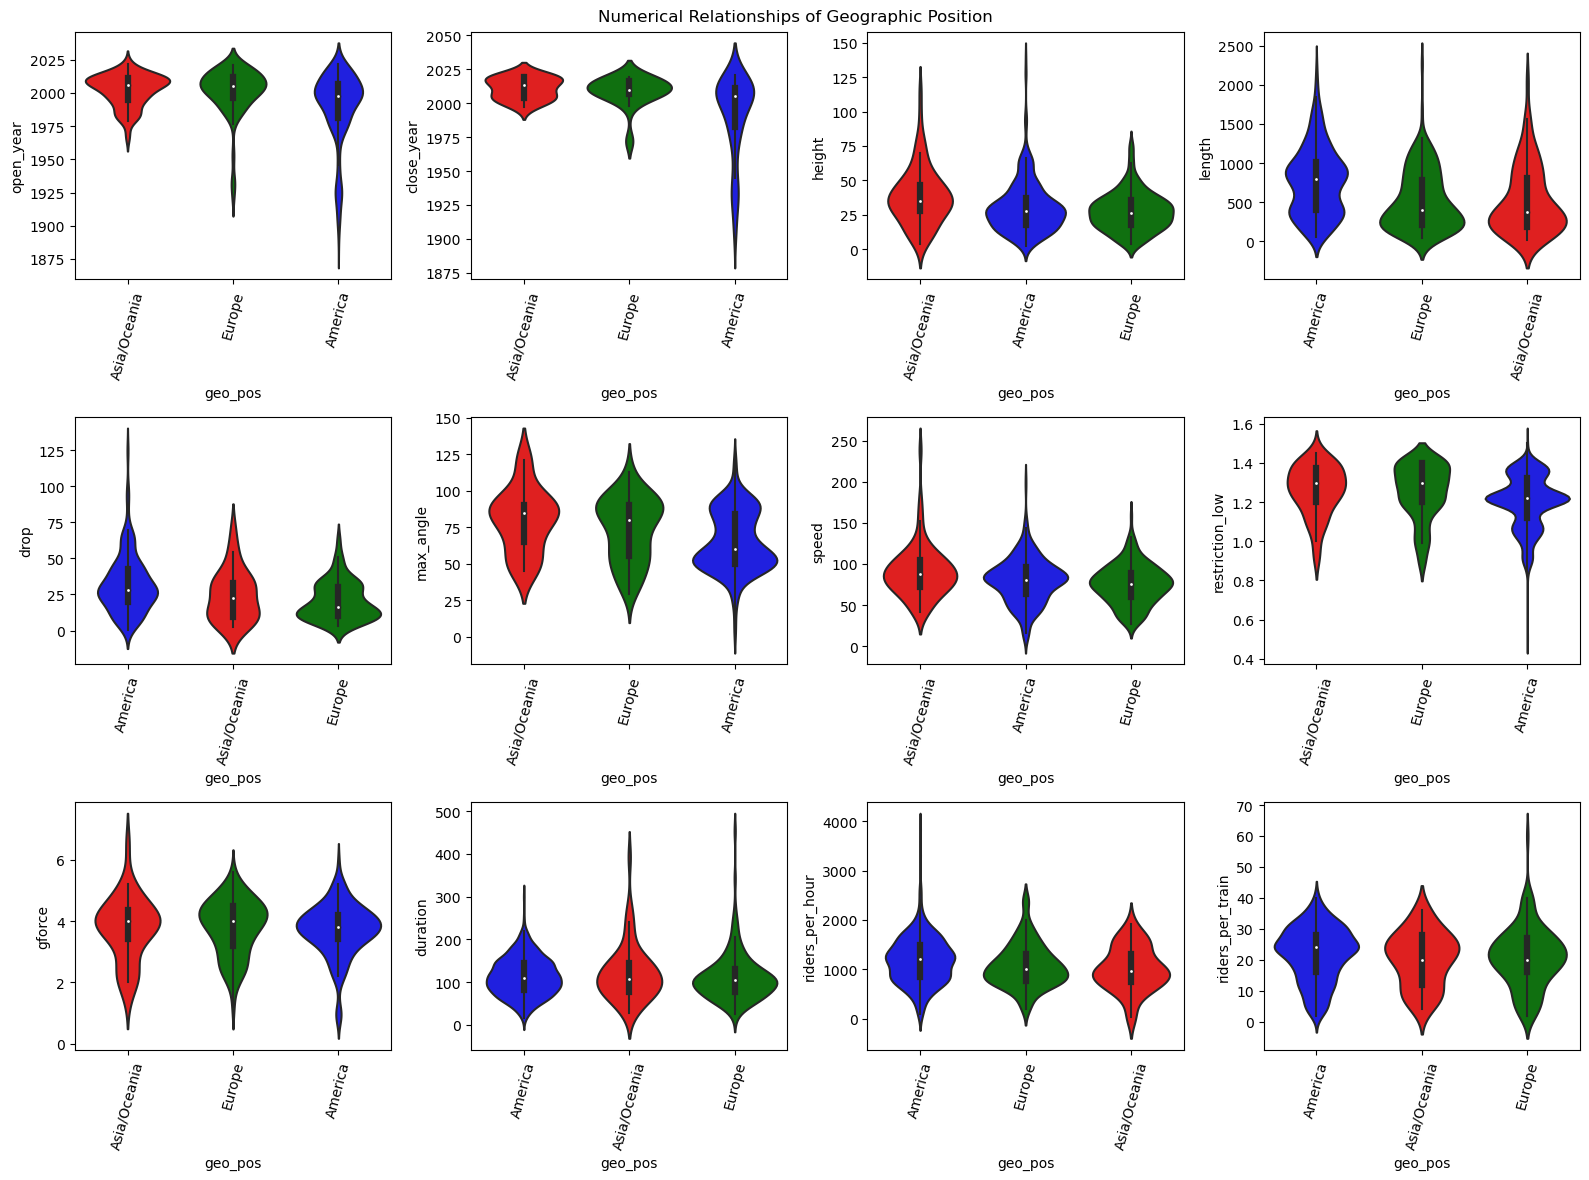

In [149]:
num_cols = df.iloc[:, num].columns
total_cols = list(num_cols) + ['geo_pos']

df_aux = df.loc[:, total_cols]

series = df_aux.loc[:, 'geo_pos'].value_counts().index

col_drop = num_cols.to_list()
col_drop.remove('inversions')
    
sc = 0.8
    
color = ['b', 'g', 'r']

my_pal = {s:cr for s, cr  in zip(series, color)}
    
fig, ax = plt.subplots(3, 4, figsize = (20 * sc, 15 * sc))
    
fig.suptitle(f'Numerical Relationships of Geographic Position')
    
for i, col in enumerate(col_drop):
    
        my_order = df_aux.groupby(
            by=['geo_pos'])[col].median(
        ).sort_values(ascending=False)

        sns.violinplot(data=df_aux, x = 'geo_pos', y = col, ax = ax[i//4, i%4],
                    order = my_order.index, palette=my_pal);
        ax[i//4, i%4].tick_params(axis='x', rotation=75)
    
fig.tight_layout()

Conclusions:

* One might supposed that the roller coasters started in America. But the dataset did not considered the previous initiatives in Russia and France, leading to wrong conclusions.
* The large drops roller coasters are concentrated in America.
* Max angles are located in Asia/Oceania on average, followed by Europe and America, the last one having a 
* Asia/Oceania have the fastest roller coasters, followed by America and Europe.

In [150]:
df_aux.loc[:, ['geo_pos', 'speed']].groupby('geo_pos').describe()

speed                                                           
              count       mean        std    min    25%    50%     75%     max
geo_pos                                                                       
America       439.0  80.001458  27.555190   8.00  63.84  80.00   96.00  204.80
Asia/Oceania   74.0  90.125405  31.541243  41.60  71.52  87.52  104.32  238.56
Europe        186.0  75.443441  24.018277  26.88  59.68  75.84   89.44  159.04

In [151]:
df_aux.loc[:, ['geo_pos', 'max_angle']].groupby('geo_pos').describe()

max_angle                                                      
                 count       mean        std   min    25%   50%   75%    max
geo_pos                                                                     
America          190.0  65.375789  20.350233   3.0  50.00  60.0  84.0  121.5
Asia/Oceania      29.0  79.931034  21.655057  45.0  65.00  85.0  90.0  121.0
Europe            58.0  73.737931  21.786354  29.0  55.25  80.0  90.0  113.1

## 5. Conclusion 

By analyzing these various aspects, we can gain insights into the design, safety considerations, and rider experience of roller coasters. These findings can be valuable for park operators, ride designers, and enthusiasts seeking to understand the dynamics and characteristics of roller coasters worldwide.

In [36]:
#df_ml = df.loc[:, ['type',
#           'geo_pos',
#           'lift_launch',
#           'height',
#           'length',
#           'drop',
#           'max_angle',
#           'inversions',
#           'speed',
#           'restriction_low',
#           'gforce',
#           'duration',
#           'riders_per_hour',
#           'riders_per_train']]